# Digital Image Processing - HW8 - 98722278 - Mohammad Doosti Lakhani
In this notebook, I have solved the assignment's problems which are as follows:
1. Do the following tasks on the given image below:
```python
[[21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48]]
```
    1. Calculate entropy
    2. Compress image using Huffman coding
    3. Calculate Compression ratio `C`
    4. If we intensity differences to code image, calculate entropy


2. Here are the steps for this task:
    1. Create an image using uniform distribution in range of [0, 255] with size of (256, 256)
    1. Save image using JPG format and report compression ratio and read saved image and report error using RMS metric
    2. Do step 1 on image where all pixels are `128`
    3. Do step 1 on image where first half (`[:half, :]`) is 128 and latter half is `0`
    4. Do step 1 on `image2.bmp`
    
![image2.bmp](wiki/image2.bmp)
    
    
3. Study JPEG coding and then calculate jpg coding for `image3.bmp`. Note that for calculating DCT you can use libraries but other parts need to be handled manually.

![image3 screenshot](images/image3_screenshot.jpg)

4. Summarize [Multiresolution segmentation algorithm](http://www.ecognition.com/sites/default/files/405_baatz_fp_12.pdf)

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os
%matplotlib inline

## 1 Do the following tasks on the given image below:
```python
[[21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48],
 [21, 21, 30, 39, 48]]
```
1. Calculate entropy
2. Compress image using Huffman coding
3. Calculate Compression ratio `C`
4. If we intensity differences to code image, calculate entropy


![answer to question 1](wiki/8-1.jpg)

## 2 Here are the steps for this task:
1. Create an image using uniform distribution in range of `[0, 255]` with size of `(256, 256)`
1. Save image using JPG format and report compression ratio and read saved image and report error using RMS metric
2. Do step 1 on image where all pixels are `128`
3. Do step 1 on image where first half (`[half:, :]`) is 128 and latter half is `0`
4. Do step 1 on `image2.bmp`
5. Analyze outputs
    
![image2.bmp](wiki/image2.bmp)

In [23]:
def rmse(image, compressed):
    """
    Calculates the Root Mean Squared Error
    
    :param image: original image in ndarray
    :param compressed: compressed image in ndarray
    :return: a float rmse value
    """
    image = image.flatten()
    compressed = compressed.flatten()
    return np.sqrt(((compressed - image)**2).mean())

### 2.A Create an image using uniform distribution

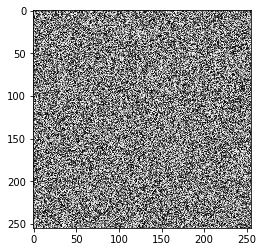

In [13]:
image = np.random.uniform(0, 255, size=(255, 255)).astype(np.uint8)
plt.imshow(image, cmap='gray')

### 2.B Save image using JPG format and report compression ratio and RMS error

In [24]:
path = 'images/uniform.jpg'
assert True == cv2.imwrite(path, image)
image_compressed = cv2.imread(path, 0)
print('Compression Ratio: ', (image.shape[0]*image.shape[1]) / os.stat(path).st_size)
print('RMSE: ', rmse(image ,image_compressed))

Compression Ratio:  0.982428839064483
RMSE:  1.94711707355


In this example, JPEG failed and the output has not been compressed at all and the reason is the image with uniform prob means every pixel has equal chance to happen anywhere so in DCT transform, almost all basis functions will have big values. On top of it, Huffman works using probability and compressed more frequent infomations, but in uniform, all have same prob so Huffman failes too.

### 2.C Do step 1 on image where all pixels are 128

In [43]:
image = (np.ones((255, 255))*128).astype(np.uint8)
path = 'images/128.jpg'
assert True == cv2.imwrite(path, image)
image_compressed = cv2.imread(path, 0)
print('Compression Ratio: ', (image.shape[0]*image.shape[1]) / os.stat(path).st_size)
print('RMSE: ', rmse(image ,image_compressed))

Compression Ratio:  59.221311475409834
RMSE:  0.0


![128.jpg image](images/128.jpg)

This instance has the most possible compression ratio. The reason is that first of all there is only one value which is 128 so the probability of it will be 1 and other values are 0. DCT of this image has only DC value because there is no noise in image and as we know that DC values computed using differences between each 8x8 region, this value is very small too so Huffman needs to only code 1 number and all other values are zero. The error is 0 because retrieving an image with only a DC value has very little loss that can be ignored.

### 2.D Do step 1 on image where first half is 128 and latter half is 0 (row wise)

In [45]:
image = (np.ones((255, 255))*128).astype(np.uint8)
image[image.shape[0]//2: ,:] = 0
path = 'images/128_0.jpg'
assert True == cv2.imwrite(path, image)
image_compressed = cv2.imread(path, 0)
print('Compression Ratio: ', (image.shape[0]*image.shape[1]) / os.stat(path).st_size)
print('RMSE: ', rmse(image ,image_compressed))

Compression Ratio:  39.31378476420798
RMSE:  0.0


![128_0.jpg](images/128_0.jpg)

Explanation about huge compression ratio for this image is identical because of the explanation has been provided in the previous example but something that needs to be discussed here is that the ratio is much smaller than image with all same value and the reason is that in this situation, all values of DCT except DC itself are not zero which majority of them are coefficients of the basis functions contributing to vertical changes(first column of DCT is not zero with huge value for some of basis function with same phase or similar to image). Note that the error should not be zero but because it is literally close to zero, the calculations show zero for error because quantization will impact on coefficients.

### 2.E Do step 1 on `image2.bmp`

In [46]:
path = 'wiki/image2.bmp'
image = cv2.imread(path, 0)
path = 'images/image2.jpg'
assert True == cv2.imwrite(path, image)
image_compressed = cv2.imread(path, 0)
print('Compression Ratio: ', (image.shape[0]*image.shape[1]) / os.stat(path).st_size)
print('RMSE: ', rmse(image ,image_compressed))

Compression Ratio:  1.9804780756096825
RMSE:  1.70276659073


![image2.jpg](images/image2.jpg)

This is a natural image which means most of DCT basis functions have non-zero coefficients but many of them are small because of low amount of noise in image so we still can get a good compression ratio but obviously not close the previous instances. The error rate must be below than the uniform distributed image because still there are many corelations between adjacent pixels etc in natural images so probability distribution of this image can help Huffman to work much better. Visualizing histogram will indicate us this fact.

### 2.F Analyze outputs
Explanations are available after each result

## 3 Study JPEG coding and then calculate jpg coding for `image3.bmp`

![image3 screenshot](images/image3_screenshot.jpg)

1. Patch
2. Shift
3. DCT
4. Quantization
5. Zig-Zag
6. Binary

In [114]:
np.set_printoptions(suppress=True)
image = cv2.imread('wiki/image3.bmp', 0).astype(np.float32)
print(image.astype(int))

[[120 125 102  95  90  80  80  78  90  90  90  90  90  90  90  90]
 [122 127 105  96  92  81  80  77  90  90  90  90  90  90  90  90]
 [125 130 110  98  94  81  79  75  90  90  90  90  90  90  90  90]
 [130 135 112 100  96  80  78  74  90  90  90  90  90  90  90  90]
 [125 120 100  90  80  75  73  70  90  90  90  90  90  90  90  90]
 [120 100  90  82  71  70  65  64  90  90  90  90  90  90  90  90]
 [116  92  81  74  73  63  63  60  90  90  90  90  90  90  90  90]
 [115  85  75  70  65  62  60  55  90  90  90  90  90  90  90  90]]


### 3.A Patch

In [115]:
image1 = image[:, :image.shape[1]//2]
image2 = image[:, image.shape[1]//2:]
print(image1)
print(image2)

[[ 120.  125.  102.   95.   90.   80.   80.   78.]
 [ 122.  127.  105.   96.   92.   81.   80.   77.]
 [ 125.  130.  110.   98.   94.   81.   79.   75.]
 [ 130.  135.  112.  100.   96.   80.   78.   74.]
 [ 125.  120.  100.   90.   80.   75.   73.   70.]
 [ 120.  100.   90.   82.   71.   70.   65.   64.]
 [ 116.   92.   81.   74.   73.   63.   63.   60.]
 [ 115.   85.   75.   70.   65.   62.   60.   55.]]
[[ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]
 [ 90.  90.  90.  90.  90.  90.  90.  90.]]


### 3.B Shift

In [116]:
k = 8
image1 = image1 - 2**(k-1)
image2 = image2 - 2**(k-1)
print(image1)
print(image2)

[[ -8.  -3. -26. -33. -38. -48. -48. -50.]
 [ -6.  -1. -23. -32. -36. -47. -48. -51.]
 [ -3.   2. -18. -30. -34. -47. -49. -53.]
 [  2.   7. -16. -28. -32. -48. -50. -54.]
 [ -3.  -8. -28. -38. -48. -53. -55. -58.]
 [ -8. -28. -38. -46. -57. -58. -63. -64.]
 [-12. -36. -47. -54. -55. -65. -65. -68.]
 [-13. -43. -53. -58. -63. -66. -68. -73.]]
[[-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]
 [-38. -38. -38. -38. -38. -38. -38. -38.]]


### 3.C DCT

In [117]:
dct1 = cv2.dct(image1)
dct2 = cv2.dct(image2)
print(dct1)
print(dct2)

[[-305.125     141.696579   34.587452   14.095837    4.125      -4.228173
    -9.591125    0.754964]
 [  70.202721    4.778924   -9.207951  -13.030813  -11.124005  -14.844501
   -12.157721   -2.944922]
 [ -33.078762  -13.394925    2.911613    6.277874    5.356743    4.534147
     2.274049    1.45818 ]
 [  -8.16151    -3.94741     3.605062   -0.925836    0.730066    2.639135
     2.547456   -2.924389]
 [   4.875       3.040256    1.341382   -0.09817    -1.375      -0.868863
    -2.314507   -1.518153]
 [   5.644981    1.603319   -2.706369   -0.494748    1.565961   -2.743582
    -2.083338    3.012747]
 [  -3.751903   -0.391161    0.024048   -0.163712   -0.459948    2.595279
     3.088388   -1.714436]
 [  -2.581657   -1.578806    1.253527   -0.115654   -0.577733   -0.209744
    -0.898003    0.390495]]
[[-304.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. 

### 3.D Quantization

In [119]:
z = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])
quantized1 = np.round(dct1/z)
quantized2 = np.round(dct2/z)
print(quantized1)
print(quantized2)

[[-19.  13.   3.   1.   0.  -0.  -0.   0.]
 [  6.   0.  -1.  -1.  -0.  -0.  -0.  -0.]
 [ -2.  -1.   0.   0.   0.   0.   0.   0.]
 [ -1.  -0.   0.  -0.   0.   0.   0.  -0.]
 [  0.   0.   0.  -0.  -0.  -0.  -0.  -0.]
 [  0.   0.  -0.  -0.   0.  -0.  -0.   0.]
 [ -0.  -0.   0.  -0.  -0.   0.   0.  -0.]
 [ -0.  -0.   0.  -0.  -0.  -0.  -0.   0.]]
[[-19.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


### 3.E Zig-Zag (by [ghallak](https://github.com/ghallak/jpeg-python/))

In [122]:
def zigzag_points(rows, cols):
    # constants for directions
    UP, DOWN, RIGHT, LEFT, UP_RIGHT, DOWN_LEFT = range(6)

    # move the point in different directions
    def move(direction, point):
        return {
            UP: lambda point: (point[0] - 1, point[1]),
            DOWN: lambda point: (point[0] + 1, point[1]),
            LEFT: lambda point: (point[0], point[1] - 1),
            RIGHT: lambda point: (point[0], point[1] + 1),
            UP_RIGHT: lambda point: move(UP, move(RIGHT, point)),
            DOWN_LEFT: lambda point: move(DOWN, move(LEFT, point))
        }[direction](point)

    # return true if point is inside the block bounds
    def inbounds(point):
        return 0 <= point[0] < rows and 0 <= point[1] < cols

    # start in the top-left cell
    point = (0, 0)

    # True when moving up-right, False when moving down-left
    move_up = True

    for i in range(rows * cols):
        yield point
        if move_up:
            if inbounds(move(UP_RIGHT, point)):
                point = move(UP_RIGHT, point)
            else:
                move_up = False
                if inbounds(move(RIGHT, point)):
                    point = move(RIGHT, point)
                else:
                    point = move(DOWN, point)
        else:
            if inbounds(move(DOWN_LEFT, point)):
                point = move(DOWN_LEFT, point)
            else:
                move_up = True
                if inbounds(move(DOWN, point)):
                    point = move(DOWN, point)
                else:
                    point = move(RIGHT, point)

                    
zigzag1 = np.array([quantized1[point] for point in zigzag_points(*quantized1.shape)])
zigzag2 = np.array([quantized2[point] for point in zigzag_points(*quantized2.shape)])
print(zigzag1)
print(zigzag2)

[-19.  13.   6.  -2.   0.   3.   1.  -1.  -1.  -1.   0.  -0.   0.  -1.   0.
  -0.  -0.   0.   0.   0.   0.  -0.   0.   0.  -0.   0.  -0.  -0.   0.  -0.
   0.   0.  -0.  -0.  -0.  -0.  -0.   0.  -0.  -0.   0.   0.  -0.   0.   0.
  -0.   0.  -0.   0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.   0.  -0.  -0.   0.
   0.  -0.  -0.   0.]
[-19.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]


### 3.F Binary Coding

![answer to question 3](wiki/8-30.jpg)
![answer to question 3 - continue](wiki/8-31.jpg)

## 4 Summarize [Multiresolution segmentation algorithm](http://www.ecognition.com/sites/default/files/405_baatz_fp_12.pdf)

First of all it is a bottom-up approach which means it first starts from pixel-level objects then expand it w.r.t a local scale parameter. (There is a global scale parameter too) to bigger objects surrounded by neighbor pixels.

Let's define a seed pixel then we look around it (8-connected) to find the best fitting pixel. When the best one found, we check it is common or not; if it is then merge this too and find other best fitting, if not, go and find another best fitting w.r.t to new found node.

For instance, let's say we are on `a` then best fitting is `b`. `a` and `b` are common so we merge them as one object `ab`. On the other hand, if they are not common, then we change seed from `a` to `b` (`b` is the best fitting of `a`) and now we look for best fitting for `b` and let's say it is `c`. We change seed to `c` and do the things all over again. (Note that every single object only can be seen once)

There are some parameters like shape, color, etc that can effect of merging directly. The reason is major effect is handled by the definition of best fitting object (neighbor) where aforementioned parameters have impact on this measurement direcly. But the most important one is *scale parameter*.

Scale parameter controls the variance of the diversity of the pixels within merged object. In precise manner, if we increase this parameters more neighbors will be considered as 'common' and merged so the size of the segmented object will be increased and vice versa. (usually can be found using validation idea procedure)
A simple example would be if you set scale parameter small in a image of airport, airplanes, even people can be segmented but if you set a really high value for this parameter, then only airplanes and band of airport will be segmented and almost all small stuff will be discared.

But how do we say two neighbor are 'common' (homogeneous)?
4 different situation can happen:
1. Fulfill criterion
2. Fulfill criterion w.r.t to scale parameter
3. Fulfill the criterion bidirectionally (both neighbors choose each other as best)
4. Scene-wise mergin when two big objects fulfill criterion

Here *degree of fitting* has been defined to find the similarity of two object within n-dimentional feature space:

![formula 1](wiki/f1.jpg)

or standardized verions.

Now when we merge two objects(any level) then the homogenousity of shapes will decrease and of course heterogeneity will increase. So the optimization focus on merging most common objects while minimizing this increase in disparateness.
Here is the difference of heterogeneity after merge happens:

![f2](wiki/f2.jpg)

It is also possible to take into account the size of objects or weighting.